In [117]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Preprocess Data

In [65]:
df = pd.read_csv('complete_nlp.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127327 entries, 0 to 127326
Data columns (total 47 columns):
Unnamed: 0                    127327 non-null int64
business_id                   127327 non-null object
stars                         127327 non-null float64
BikeParking                   88373 non-null object
BusinessAcceptsCreditCards    117514 non-null object
BusinessParking               93323 non-null object
GoodForKids                   71203 non-null object
HasTV                         58744 non-null object
NoiseLevel                    57762 non-null object
OutdoorSeating                61561 non-null object
RestaurantsAttire             53041 non-null object
RestaurantsDelivery           56307 non-null object
RestaurantsGoodForGroups      59566 non-null object
RestaurantsPriceRange2        93788 non-null float64
RestaurantsReservations       56463 non-null object
RestaurantsTakeOut            61741 non-null object
Alcohol                       60486 non-null object


In [66]:
# drop columns that are not useable
df.drop(columns=['Unnamed: 0','business_id','BusinessParking','text'],inplace=True)
df.head()

,stars,BikeParking,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,...,BusinessAcceptsBitcoin,HairSpecializesIn,AgesAllowed,RestaurantsCounterService,Open24Hours,DietaryRestrictions,useful,review_stars,count(checkins),sentiments
0,4.0,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11,4,47,0.6
1,4.0,False,True,False,False,average,False,dressy,False,True,...,NaN,NaN,NaN,NaN,False,NaN,9,4,140,0.4
2,4.0,False,True,False,False,average,False,dressy,False,True,...,NaN,NaN,NaN,NaN,False,NaN,17,4,140,0.4
3,4.0,False,True,False,False,average,False,dressy,False,True,...,NaN,NaN,NaN,NaN,False,NaN,10,4,140,0.2
4,4.0,False,True,False,False,average,False,dressy,False,True,...,NaN,NaN,NaN,NaN,False,NaN,12,4,140,0.5


In [67]:
# take out the numeric coutinuous value and store it
countinuous_col = ['useful','count(checkins)','sentiments']
df_num = df[countinuous_col]
df.drop(columns=countinuous_col,inplace = True)

In [68]:
df = df.fillna("NA")

In [69]:
df = df.astype(str)

In [70]:
df.head()

,stars,BikeParking,BusinessAcceptsCreditCards,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,...,Smoking,ByAppointmentOnly,AcceptsInsurance,BusinessAcceptsBitcoin,HairSpecializesIn,AgesAllowed,RestaurantsCounterService,Open24Hours,DietaryRestrictions,review_stars
0,4.0,True,True,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,4
1,4.0,False,True,False,False,average,False,dressy,False,True,...,NA,NA,NA,NA,NA,NA,NA,False,NA,4
2,4.0,False,True,False,False,average,False,dressy,False,True,...,NA,NA,NA,NA,NA,NA,NA,False,NA,4
3,4.0,False,True,False,False,average,False,dressy,False,True,...,NA,NA,NA,NA,NA,NA,NA,False,NA,4
4,4.0,False,True,False,False,average,False,dressy,False,True,...,NA,NA,NA,NA,NA,NA,NA,False,NA,4


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127327 entries, 0 to 127326
Data columns (total 40 columns):
stars                         127327 non-null object
BikeParking                   127327 non-null object
BusinessAcceptsCreditCards    127327 non-null object
GoodForKids                   127327 non-null object
HasTV                         127327 non-null object
NoiseLevel                    127327 non-null object
OutdoorSeating                127327 non-null object
RestaurantsAttire             127327 non-null object
RestaurantsDelivery           127327 non-null object
RestaurantsGoodForGroups      127327 non-null object
RestaurantsPriceRange2        127327 non-null object
RestaurantsReservations       127327 non-null object
RestaurantsTakeOut            127327 non-null object
Alcohol                       127327 non-null object
Caters                        127327 non-null object
DogsAllowed                   127327 non-null object
DriveThru                     127327 non-

In [72]:
df_complete = df.join(df_num)

In [73]:
# there are some NAs in sentiments, drop those samples
df_complete.dropna(subset=['sentiments'],inplace=True)

In [113]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127325 entries, 0 to 127326
Data columns (total 43 columns):
stars                         127325 non-null object
BikeParking                   127325 non-null object
BusinessAcceptsCreditCards    127325 non-null object
GoodForKids                   127325 non-null object
HasTV                         127325 non-null object
NoiseLevel                    127325 non-null object
OutdoorSeating                127325 non-null object
RestaurantsAttire             127325 non-null object
RestaurantsDelivery           127325 non-null object
RestaurantsGoodForGroups      127325 non-null object
RestaurantsPriceRange2        127325 non-null object
RestaurantsReservations       127325 non-null object
RestaurantsTakeOut            127325 non-null object
Alcohol                       127325 non-null object
Caters                        127325 non-null object
DogsAllowed                   127325 non-null object
DriveThru                     127325 non-

In [88]:
# encode the categorical variable to foat arrays
enc = OneHotEncoder(handle_unknown='ignore')
Y = enc.fit_transform(df_complete['stars'].values.reshape(len(df_complete['stars']),1))

x = df_complete.loc[:,'BikeParking':]
X = enc.fit_transform(x).toarray()

In [94]:
Y.shape

(127325, 9)

In [91]:
# split the training and testing set
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [97]:
x_train.shape

(95493, 980)

# Neural Net

In [115]:
model = Sequential()
# input layer
model.add(Dense(units=981, activation='sigmoid', input_dim=980))

# Hidden layers
model.add(Dense(units=3, activation='sigmoid'))
model.add(Dense(units=3, activation='sigmoid'))

# output layer
model.add(Dense(units=9, activation='softmax'))

# Stochastic gradient descent optimizer.
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
# compile the model
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
hist = model.fit(x_train,y_train,epochs=100)

Epoch 1/100
95493/95493 [==============================] - 38s 397us/step - loss: 1.8373 - acc: 0.2841
Epoch 2/100
95493/95493 [==============================] - 31s 327us/step - loss: 1.7338 - acc: 0.3003
Epoch 3/100
95493/95493 [==============================] - 31s 325us/step - loss: 1.6733 - acc: 0.3096
Epoch 4/100
95493/95493 [==============================] - 32s 331us/step - loss: 1.6291 - acc: 0.3250
Epoch 5/100
95493/95493 [==============================] - 31s 326us/step - loss: 1.5849 - acc: 0.3450
Epoch 6/100
95493/95493 [==============================] - 31s 327us/step - loss: 1.5617 - acc: 0.3507
Epoch 7/100
95493/95493 [==============================] - 32s 340us/step - loss: 1.5509 - acc: 0.3534
Epoch 8/100
95493/95493 [==============================] - 33s 348us/step - loss: 1.5429 - acc: 0.3555
Epoch 9/100
95493/95493 [==============================] - 33s 347us/step - loss: 1.5356 - acc: 0.3576
Epoch 10/100
95493/95493 [==============================] - 34s 360us/ste

95493/95493 [==============================] - 31s 324us/step - loss: 1.1658 - acc: 0.5364
Epoch 80/100
95493/95493 [==============================] - 31s 327us/step - loss: 1.1598 - acc: 0.5375
Epoch 81/100
95493/95493 [==============================] - 31s 329us/step - loss: 1.1547 - acc: 0.5419
Epoch 82/100
95493/95493 [==============================] - 31s 326us/step - loss: 1.1497 - acc: 0.5428
Epoch 83/100
95493/95493 [==============================] - 31s 327us/step - loss: 1.1431 - acc: 0.5463
Epoch 84/100
95493/95493 [==============================] - 32s 337us/step - loss: 1.1387 - acc: 0.5502
Epoch 85/100
95493/95493 [==============================] - 34s 361us/step - loss: 1.1329 - acc: 0.5517
Epoch 86/100
95493/95493 [==============================] - 35s 362us/step - loss: 1.1271 - acc: 0.5544
Epoch 87/100
95493/95493 [==============================] - 34s 359us/step - loss: 1.1218 - acc: 0.5564
Epoch 88/100
95493/95493 [==============================] - 34s 358us/step - 

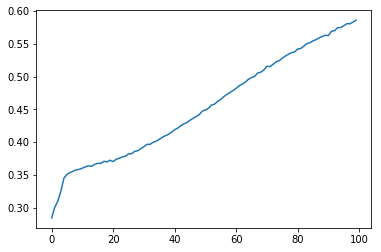

In [125]:
plt.plot(hist.history['acc'])

In [123]:
model_json = model.to_json()
with open("model.json",'w') as json_file:
    json_file.write(model_json)

In [124]:
model.save_weights("model_weights.h5")